In [1]:
import warnings
warnings.filterwarnings("ignore")

1. Datasets contain structurd data used for analysis. We import them using 'pandas', a dataset library. 
2. Combining datasets(merging) helps in gaining deeper insights. We use 'merge()' function in pandas to join multiple datasets

In [2]:

import pandas as pd

df1 = pd.read_csv("D:\\PDS\\Food_Preference.csv")
df2 = pd.read_csv("D:\\PDS\\indian_food.csv")

merged_df = pd.merge(df1, df2, how='outer', left_on='Food', right_on='name')
print("Merged data:")
merged_df.head()

Merged data:


,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North


1. Inspecting Data by using (.info(), .describe())
2. Handling Missing Data by using (dropna(), fillna())
3. VAlue distributon analysis using (.value_counts())

In [3]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = "D:\\PDS\\indian_food.csv"
df = pd.read_csv(file_path)

# Basic Data pre-processing
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nFirst 5 Rows:")
print(df.head())

# Checking for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

# Handling Missing Data
# Dropping rows with any missing values
df_cleaned = df.dropna()
print("\nAfter Dropping Nulls:")
print(df_cleaned.isnull().sum())

# Filling missing values with column means (if numeric)
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nDataset after Filling Nulls with Column Means:")
print(df_filled.isnull().sum())

# Value counts for a specific column ('diet' as an example)
print("\nValue Counts for 'diet':")
print(df['diet'].value_counts())

# Checking for Duplicates
print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB

Dataset Description:
              name              ingredients        diet   prep_time  \
count          255                      255         255  255.000000   
unique         255                      252           2         NaN   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian         NaN   
freq             1                       

DATA VISULAISATION



Data visualisation helps in understanding patterns and trends

SCATTER PLOT- Used to show relationship between two numerical varibales

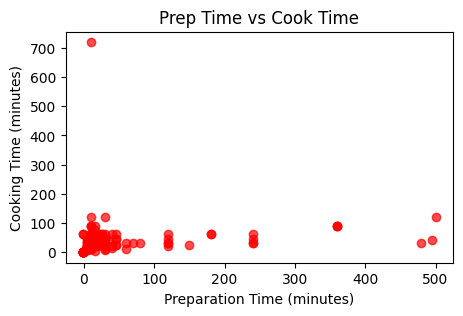

In [4]:
# Scatter Plot
plt.figure(figsize=(5, 3))
plt.scatter(df['prep_time'], df['cook_time'], alpha=0.7, color='r')
plt.title('Prep Time vs Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.show()

BAR GRPAH- used to comparing categorical data

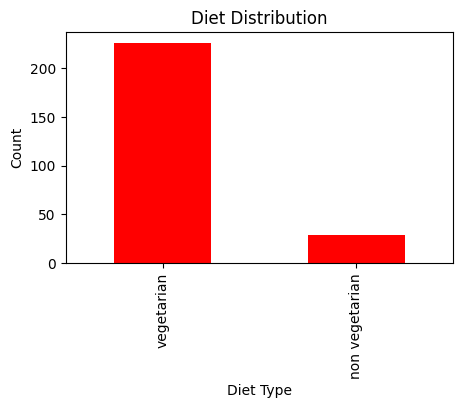

In [5]:
# Bar Plot
plt.figure(figsize=(5, 3))
df['diet'].value_counts().plot(kind='bar', color='red')
plt.title('Diet Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

PIE CHARTS- Represents proportions within a whole

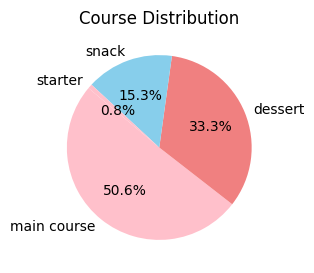

In [6]:
# Pie Chart
plt.figure(figsize=(5, 3))
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'lightcoral', 'skyblue'])
plt.title('Course Distribution')
plt.ylabel('')
plt.show()

BOX PLOT- visually represents data distribution using box and whiskers to show minimum, first quartile(Q1), median, third qusrtile(Q3), maximum and outliers

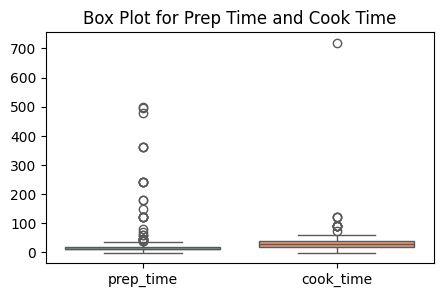

In [7]:
# Box Plot (Outliers)
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[['prep_time', 'cook_time']], palette='Set2')
plt.title('Box Plot for Prep Time and Cook Time')
plt.show()

WAVE GRAPH- represents periodic data, showing peaks through continuous, flowing manner

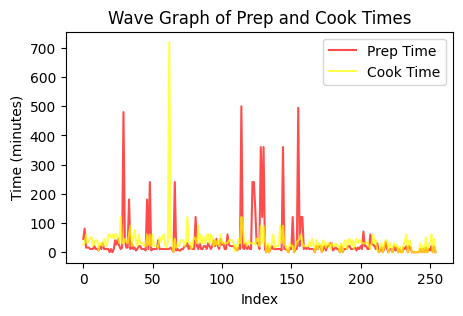

In [8]:
# Wave Graph (Uniform Curve)
plt.figure(figsize=(5, 3))
plt.plot(df['prep_time'], label='Prep Time', color='red', alpha=0.7)
plt.plot(df['cook_time'], label='Cook Time', color='yellow', alpha=0.7)
plt.title('Wave Graph of Prep and Cook Times')
plt.xlabel('Index')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()

Calculating skewness to see where our data is more relaying prep or cook time. by output we can see the dataset is more heavier towards cook time


Skewness of Numeric Columns:


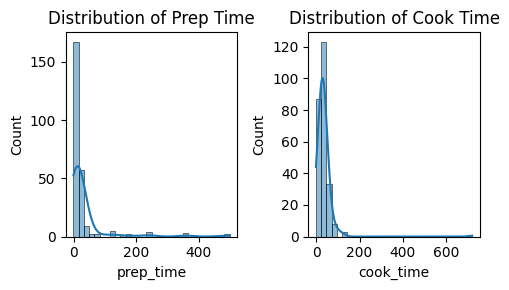

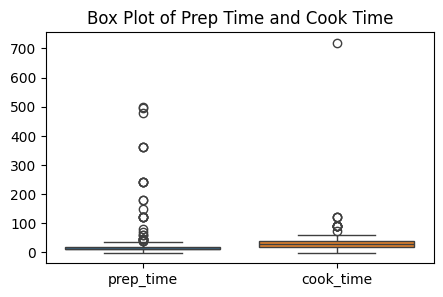

In [16]:
# Skewness
print("\nSkewness of Numeric Columns:")
df[['prep_time', 'cook_time']].skew()

fig, axes = plt.subplots(1, 2, figsize=(5, 3))

sns.histplot(df['prep_time'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prep Time')

sns.histplot(df['cook_time'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cook Time')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time")
plt.show()


Detecting outliers using IQR


IQR:
prep_time    10.0
cook_time    20.0
dtype: float64

Lower Bound for Outliers:
prep_time    -5.0
cook_time   -10.0
dtype: float64

Upper Bound for Outliers:
prep_time    35.0
cook_time    70.0
dtype: float64


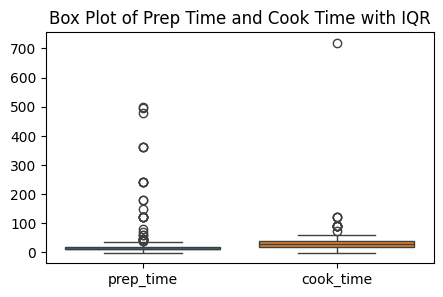

In [17]:
Q1 = df[['prep_time', 'cook_time']].quantile(0.25)
Q3 = df[['prep_time', 'cook_time']].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print("\nIQR:")
print(IQR)
print("\nLower Bound for Outliers:")
print(LB)
print("\nUpper Bound for Outliers:")
print(UB)

plt.figure(figsize=(5,3))
sns.boxplot(data=df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time with IQR")
plt.show()



Filtering outliers


Number of Outliers:
38


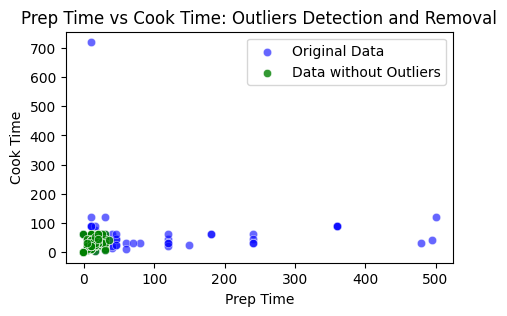

In [11]:
outliers = ((df[['prep_time', 'cook_time']] < (Q1 - 1.5 * IQR)) | (df[['prep_time', 'cook_time']] > (Q3 + 1.5 * IQR))).any(axis=1)

print("\nNumber of Outliers:")
print(outliers.sum())

df_no_outliers = df[~outliers]

plt.figure(figsize=(5, 3))

sns.scatterplot(x=df['prep_time'], y=df['cook_time'], label='Original Data', color='blue', alpha=0.6)

sns.scatterplot(x=df_no_outliers['prep_time'], y=df_no_outliers['cook_time'], label='Data without Outliers', color='green', alpha=0.8)

plt.title("Prep Time vs Cook Time: Outliers Detection and Removal")
plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.legend()
plt.show()


Z-score normalisation


First 5 Rows of Normalized Data:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian   0.191876  -0.197825          sweet  dessert  West Bengal   
1  vegetarian   0.675221  -0.094028          sweet  dessert    Rajasthan   
2  vegetarian  -0.222420   0.528754          sweet  dessert       Punjab   
3  vegetarian  -0.222420  -0.094028          sweet  dessert    Rajasthan   
4  vegetarian  -0.222420   0.113566          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  


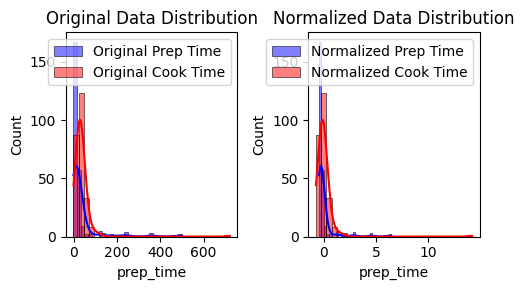

In [12]:
df_normalized = df.copy()
columns_to_normalize = ['prep_time', 'cook_time']
df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(zscore)

print("\nFirst 5 Rows of Normalized Data:")
print(df_normalized.head())

plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_normalized['prep_time'], kde=True, color='blue', label='Normalized Prep Time', bins=30)
sns.histplot(df_normalized['cook_time'], kde=True, color='red', label='Normalized Cook Time', bins=30)
plt.title("Normalized Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()


1. import preprocessing module from sklearn 
2. import labelencoder class from sklearn.preprocessing 
3. create an instance of label encoder 
4. apply label encoding to all columns whose datatype is "object" 
5. display the information 

In [13]:


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

df_normalized['diet'] = label_encoder.fit_transform(df_normalized['diet'])
df_normalized['course'] = label_encoder.fit_transform(df_normalized['course'])
df_normalized['flavor_profile'] = label_encoder.fit_transform(df_normalized['flavor_profile'])
df_normalized['state'] = label_encoder.fit_transform(df_normalized['state'])
df_normalized['region'] = label_encoder.fit_transform(df_normalized['region'])
df_normalized['name'] = label_encoder.fit_transform(df_normalized['name'])
df_normalized['ingredients'] = label_encoder.fit_transform(df_normalized['ingredients'])

df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    int64  
 1   ingredients     255 non-null    int64  
 2   diet            255 non-null    int64  
 3   prep_time       255 non-null    float64
 4   cook_time       255 non-null    float64
 5   flavor_profile  255 non-null    int64  
 6   course          255 non-null    int64  
 7   state           255 non-null    int64  
 8   region          255 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.1 KB


Training Data Shape:
X_train: (204, 8)
Y_train: (204,)

Testing Data Shape:
X_test: (51, 8)
Y_test: (51,)


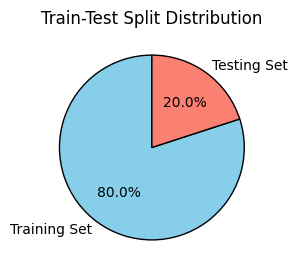

In [14]:
from sklearn.model_selection import train_test_split

x= df_normalized.drop(columns=['diet'])
y= df_normalized['diet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:")
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("\nTesting Data Shape:")
print("X_test:", x_test.shape)
print("Y_test:", y_test.shape)

sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Testing Set']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Train-Test Split Distribution')
plt.show()


First 5 Rows of Min-Max Scaled Data:
   name  ingredients  diet  prep_time  cook_time  flavor_profile  course  \
0    13          122     1   0.091816   0.036061               4       0   
1    27          100     1   0.161677   0.042996               4       0   
2    71           35     1   0.031936   0.084605               4       0   
3    76           95     1   0.031936   0.042996               4       0   
4    80          129     1   0.031936   0.056865               4       0   

   state  region  
0     24       2  
1     18       6  
2     17       3  
3     18       6  
4     24       2  


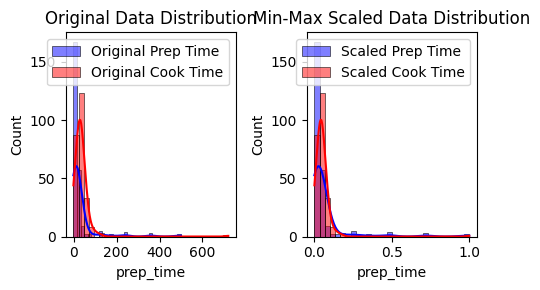

In [ ]:
g
df_min_max_scaled = df_normalized.copy()
columns_to_scale = ['prep_time', 'cook_time']
df_min_max_scaled[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

print("\nFirst 5 Rows of Min-Max Scaled Data:")
print(df_min_max_scaled.head())

plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_min_max_scaled['prep_time'], kde=True, color='blue', label='Scaled Prep Time', bins=30)
sns.histplot(df_min_max_scaled['cook_time'], kde=True, color='red', label='Scaled Cook Time', bins=30)
plt.title("Min-Max Scaled Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()
